In [ ]:
###########################
#errors in teh QFT with quiskit noise model
#and zero state only (non functioning)
###########################

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import qiskit.quantum_info as qi
from qiskit.visualization import plot_histogram
from qiskit import execute, transpile, assemble
from qiskit import Aer
from numpy import pi
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
print("Import Successfully")

Import Successfully


In [8]:
# Import from Qiskit Aer noise module
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer import AerSimulator
print("Import Successfully")

Import Successfully


## Ideal Simulation

In [13]:
def qft_rotations(circuit, n):
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    qft_rotations(circuit, n)

qc = QuantumCircuit(4)
qft_rotations(qc,4)
qc.draw()

def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

qubits = 3    #sistem-dimension
qc_ideal = QuantumCircuit(qubits)
qft(qc_ideal,qubits)
qc_ideal.save_density_matrix()
qc_ideal.measure_all()

qc_ideal.draw(fold = -1)


┌───┐    density_matrix  ░ ┌─┐      
   q_0: ──────■──────────────────────■───────┤ H ├─X────────░─────────░─┤M├──────
              │                ┌───┐ │P(π/2) └───┘ │        ░         ░ └╥┘┌─┐   
   q_1: ──────┼────────■───────┤ H ├─■─────────────┼────────░─────────░──╫─┤M├───
        ┌───┐ │P(π/4)  │P(π/2) └───┘               │        ░         ░  ║ └╥┘┌─┐
   q_2: ┤ H ├─■────────■───────────────────────────X────────░─────────░──╫──╫─┤M├
        └───┘                                               ░         ░  ║  ║ └╥┘
meas_0: ═════════════════════════════════════════════════════════════════╩══╬══╬═
                                                                            ║  ║ 
meas_1: ════════════════════════════════════════════════════════════════════╩══╬═
                                                                               ║ 
meas_2: ═══════════════════════════════════════════════════════════════════════╩═

det =  0j
Matrice densità del circuito ideale:
 0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i 
 0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i 
 0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i 
 0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i 
 0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i 
 0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i 
 0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i 
 0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i  0.125+0.000i 


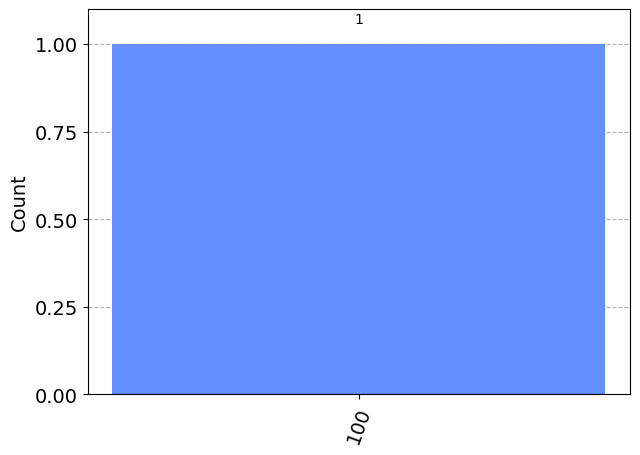

In [16]:
density_matrix_ideal = 0
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc_ideal, aer_sim)
qobj = assemble(t_qc)                                
results = aer_sim.run(qobj, shots = 1).result()

density_matrix_ideal = results.data().get('density_matrix')
density_matrix_ideal = np.asarray(density_matrix_ideal)

print('det = ', np.linalg.det(density_matrix_ideal))
print('Matrice densità del circuito ideale:')
print('\n'.join([''.join([' {0.real:.3f}+{0.imag:.3f}i '.format(item) for item in row]) 
      for row in density_matrix_ideal]))

counts = results.get_counts()
plot_histogram(counts)    

# Error models

In [31]:
p_error = 0.1

bit_flip = pauli_error([(qi.Pauli('X'), p_error), ('I', 1 - p_error)])
phase_flip = pauli_error([(qi.Pauli('Z'), p_error), ('I', 1 - p_error)])

In [32]:
print(qi.Pauli('X'))

X


In [33]:
print(bit_flip)

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.1, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(1) = 0.9, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘


In [34]:
print(phase_flip)

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.1, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
  P(1) = 0.9, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘


In [43]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    circuit.id(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    qft_rotations(circuit, n)

qc = QuantumCircuit(4)
qft_rotations(qc,4)
qc.draw()

def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

qubits = 3    #sistem-dimension
qc_noisy = QuantumCircuit(qubits)
qft(qc_noisy,qubits)
qc_noisy.save_density_matrix()
#qc_noisy.measure_all()

qc_noisy.draw(fold = -1)


┌───┐┌───┐    density_matrix 
q_0: ───────────■───────────────────────────■───────┤ H ├┤ I ├─X────────░────────
                │                ┌───┐┌───┐ │P(π/2) └───┘└───┘ │        ░        
q_1: ───────────┼────────■───────┤ H ├┤ I ├─■──────────────────┼────────░────────
     ┌───┐┌───┐ │P(π/4)  │P(π/2) └───┘└───┘                    │        ░        
q_2: ┤ H ├┤ I ├─■────────■─────────────────────────────────────X────────░────────
     └───┘└───┘                                                         ░

# Bit Flip


In [37]:
noise_bit_flip = NoiseModel()
noise_bit_flip.add_quantum_error(bit_flip, ['id'], [0])

print(noise_bit_flip)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['id']
  Qubits with noise: [0]
  Specific qubit errors: [('id', (0,))]


In [46]:
sim_noise = AerSimulator(noise_model = noise_bit_flip)
#circ_tnoise = transpile(qc_noisy, sim_noise)
#result_bit_flip = sim_noise.run(circ_tnoise, shots = 1048).result()
#counts_bit_flip = result_bit_flip.get_counts(0)
job = sim_noise.run(qc_noisy, shots = 1)
result_bit_flip = job.result()
#counts_bit_flip = result_bit_flip.get_counts(0)

tmp = result_bit_flip.data()
density_matrix_bit= tmp.get('density_matrix')
density_matrix_bit = np.asarray(density_matrix_ bit)

#print('\n'.join([''.join([' {0.real:.6f}+{0.imag:.2f}i '.format(item) for item in row]) 
#      for row in density_matrix_bit]))
print(density_matrix_bit)

#plot_histogram(counts_bit_flip)


[[0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j
  0.125+0.j]
 [0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j
  0.125+0.j]
 [0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j
  0.125+0.j]
 [0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j
  0.125+0.j]
 [0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j
  0.125+0.j]
 [0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j
  0.125+0.j]
 [0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j
  0.125+0.j]
 [0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j 0.125+0.j
  0.125+0.j]]


# Phase Flip

In [39]:
noise_phase_flip = NoiseModel()
noise_phase_flip.add_quantum_error(phase_flip, ['id'], [0])

print(noise_phase_flip)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['id']
  Qubits with noise: [0]
  Specific qubit errors: [('id', (0,))]


In [50]:
sim_noise = AerSimulator(noise_model = noise_phase_flip)
circ_tnoise = transpile(qc_noisy, sim_noise)
result_phase_flip = sim_noise.run(circ_tnoise, shots = 1).result()
#counts_phase_flip = result_phase_flip.get_counts(0)
density_matrix_phase = result_phase_flip.data().get('density_matrix')
density_matrix_phase = np.asarray(density_matrix_phase)

print('\n'.join([''.join([' {0.real:.3f}+{0.imag:.1f}i '.format(item) for item in row]) 
      for row in density_matrix_phase]))
#print(density_matrix_phase)

#plot_histogram(counts_phase_flip)

 0.125+0.0i  0.125+-0.0i  0.125+-0.0i  0.125+-0.0i  0.125+0.0i  0.125+-0.0i  0.125+-0.0i  0.125+-0.0i 
 0.125+0.0i  0.125+0.0i  0.125+-0.0i  0.125+0.0i  0.125+0.0i  0.125+0.0i  0.125+-0.0i  0.125+0.0i 
 0.125+0.0i  0.125+0.0i  0.125+0.0i  0.125+0.0i  0.125+0.0i  0.125+0.0i  0.125+0.0i  0.125+0.0i 
 0.125+0.0i  0.125+-0.0i  0.125+-0.0i  0.125+0.0i  0.125+0.0i  0.125+-0.0i  0.125+-0.0i  0.125+0.0i 
 0.125+0.0i  0.125+-0.0i  0.125+-0.0i  0.125+-0.0i  0.125+0.0i  0.125+-0.0i  0.125+-0.0i  0.125+-0.0i 
 0.125+0.0i  0.125+0.0i  0.125+-0.0i  0.125+0.0i  0.125+0.0i  0.125+0.0i  0.125+-0.0i  0.125+0.0i 
 0.125+0.0i  0.125+0.0i  0.125+0.0i  0.125+0.0i  0.125+0.0i  0.125+0.0i  0.125+0.0i  0.125+0.0i 
 0.125+0.0i  0.125+-0.0i  0.125+-0.0i  0.125+0.0i  0.125+0.0i  0.125+-0.0i  0.125+-0.0i  0.125+0.0i 


In [ ]:
n = 2
identity = np.zeros((2**n, 2**n ))
for i in range(2**n -1 ):
    for ii in range(2**n - 1):
        if (i == ii):
            identity[i][ii] = 1
            

In [ ]:
tmp = np.sqrt(np.matmul(np.linalg.inv(density_matrix_ideal - density_matrix_phase), density_matrix_ideal - density_matrix_phase))
trace_norm = 0.5*tmp.trace()

In [ ]:
trace_norm 

In [ ]:
print('\n'.join([''.join([' {0.real:.2f}+{0.imag:.2f}i '.format(item) for item in row]) 
      for row in tmp]))

In [ ]:
tmp2 = np.matmul(density_matrix_ideal, np.linalg.inv(density_matrix_phase)) - identity
print(0.5*(tmp2**2).trace())

In [ ]:
tmp2 = np.matmul(density_matrix_ideal, np.linalg.inv(density_matrix_bit)) - identity
print(0.5*(tmp2**2).trace())